In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
import numpy as np

## Load and explore data

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

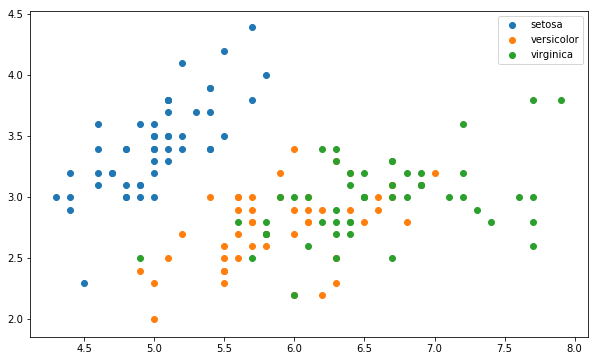

In [6]:
plt.figure(figsize=(10, 6))
for y in np.unique(iris.target):
    plt.scatter(iris.data[:,0][iris.target == y], iris.data[:,1][iris.target == y], label = iris.target_names[y])
plt.legend()
plt.show()

## Perceptron Binary Classifier

In [7]:
X = np.append(
    np.ones((len(iris.data),))[:,np.newaxis],
    iris.data[:,:2],
    axis = 1)[iris.target < 2]
Y = iris.target[iris.target < 2]
Y[Y == 1] = -1.
Y[Y == 0] = +1.
print(X.shape, Y.shape)

(100, 3) (100,)


In [8]:
X

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1],
       [1. , 5.4, 3.7],
       [1. , 4.8, 3.4],
       [1. , 4.8, 3. ],
       [1. , 4.3, 3. ],
       [1. , 5.8, 4. ],
       [1. , 5.7, 4.4],
       [1. , 5.4, 3.9],
       [1. , 5.1, 3.5],
       [1. , 5.7, 3.8],
       [1. , 5.1, 3.8],
       [1. , 5.4, 3.4],
       [1. , 5.1, 3.7],
       [1. , 4.6, 3.6],
       [1. , 5.1, 3.3],
       [1. , 4.8, 3.4],
       [1. , 5. , 3. ],
       [1. , 5. , 3.4],
       [1. , 5.2, 3.5],
       [1. , 5.2, 3.4],
       [1. , 4.7, 3.2],
       [1. , 4.8, 3.1],
       [1. , 5.4, 3.4],
       [1. , 5.2, 4.1],
       [1. , 5.5, 4.2],
       [1. , 4.9, 3.1],
       [1. , 5. , 3.2],
       [1. , 5.5, 3.5],
       [1. , 4.9, 3.6],
       [1. , 4.4, 3. ],
       [1. , 5.1, 3.4],
       [1. , 5. , 3.5],
       [1. , 4.5

In [9]:
Y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

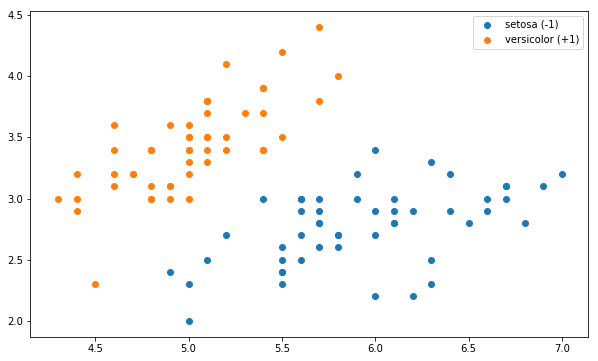

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,1][Y == -1], X[:,2][Y == -1], label = f'{iris.target_names[0]} (-1)')
plt.scatter(X[:,1][Y == +1], X[:,2][Y == +1], label = f'{iris.target_names[1]} (+1)')
plt.legend()
plt.show()

In [11]:
eta = 1.
epochs = 1000
W = np.zeros(X.shape[1])
print(W, W.shape)

[0. 0. 0.] (3,)


In [12]:
errors = []
for _ in range(epochs):
    err = 0
    for Xi, yi in zip(X, Y):
        yi_hat = 1 if np.dot(Xi.T, W) >= 0 else -1
        upd = yi - yi_hat
        W += eta * upd * Xi
        err += np.abs(upd)
    errors.append(err)
    if err == 0: break

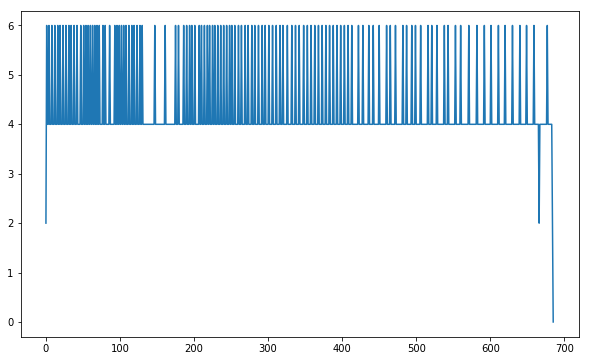

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.show()

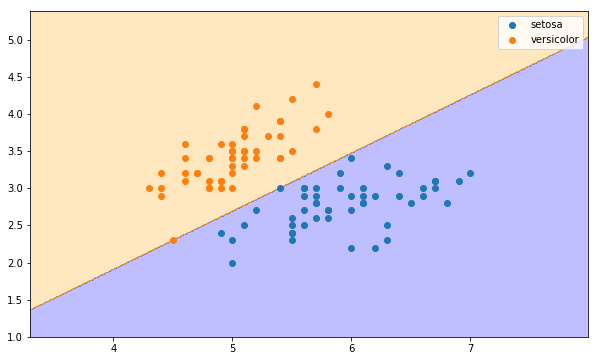

In [14]:
plt.figure(figsize=(10, 6))
x1_min, x1_max = X[:,1].min() - 1, X[:,1].max() + 1
x2_min, x2_max = X[:,2].min() - 1, X[:,2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = np.dot(np.array([np.ones_like(xx1.ravel()), xx1.ravel(), xx2.ravel()]).T, W)
Z[Z >= 0] = 1
Z[Z <  0] = 0
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha = .25, cmap = ListedColormap(['blue', 'orange']))

plt.scatter(X[:,1][Y == -1], X[:,2][Y == -1], label = iris.target_names[0])
plt.scatter(X[:,1][Y == +1], X[:,2][Y == +1], label = iris.target_names[1])

plt.legend()
plt.show()

## Binary Perceptron as function

In [15]:
def perceptron_predict(X, W):
    return np.where(np.dot(X.T, W) >= 0, 1, -1)

def perceptron_fit(X, Y, eta = 0.1, epochs = 1000):
    
    # Append intercept
    X = np.append(np.ones((len(X),))[:,np.newaxis], X, axis = 1)
    W = np.zeros(X.shape[1])
    
    errors = []
    for _ in range(epochs):
        err = 0
        for Xi, yi in zip(X, Y):
            upd = yi - perceptron_predict(Xi.T, W)
            W += eta * upd * Xi
            err += np.abs(upd)
        errors.append(err)
        if err == 0: break
            
    return W, errors

def print_errors(errors):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(errors)), errors)
    plt.show()
    
def print_contour(X, Y, W):
    plt.figure(figsize=(10, 6))
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = perceptron_predict(np.array([np.ones_like(xx1.ravel()), xx1.ravel(), xx2.ravel()]), W)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = .25, cmap = ListedColormap(['blue', 'orange']))

    plt.scatter(X[:,0][Y == -1], X[:,1][Y == -1], label = iris.target_names[0])
    plt.scatter(X[:,0][Y == +1], X[:,1][Y == +1], label = iris.target_names[1])

    plt.legend()
    plt.show()

In [16]:
X = iris.data[iris.target < 2][:,[1,2]]
Y = np.where(iris.target[iris.target < 2] >= 1, 1, -1)
print(X.shape, Y.shape)

(100, 2) (100,)


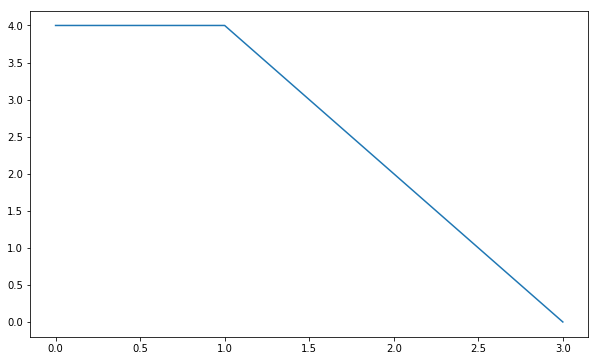

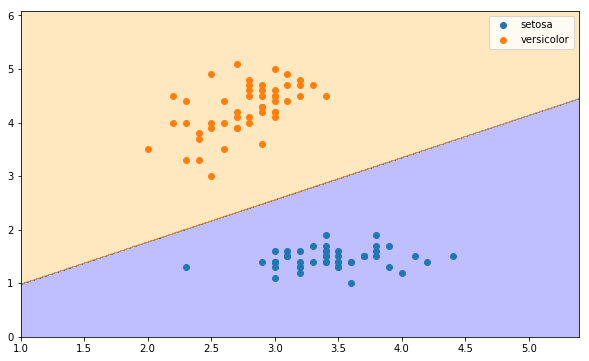

In [17]:
W, errors = perceptron_fit(X, Y)
print_errors(errors)
print_contour(X, Y, W)

In [18]:
X = iris.data[iris.target < 2][:,[0,2]]
Y = np.where(iris.target[iris.target < 2] >= 1, 1, -1)
print(X.shape, Y.shape)

(100, 2) (100,)


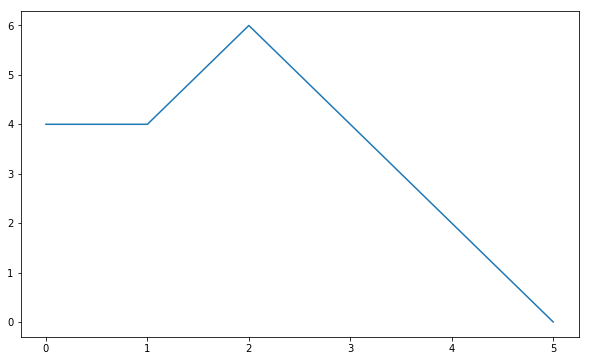

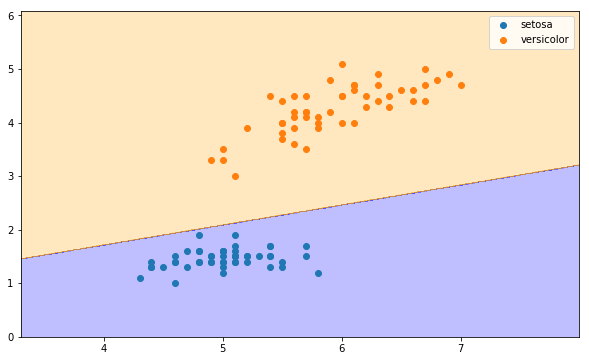

In [19]:
W, errors = perceptron_fit(X, Y)
print_errors(errors)
print_contour(X, Y, W)

In [20]:
X = iris.data[iris.target > 0][:,[0,2]]
Y = np.where(iris.target[iris.target > 0] >= 2, 1, -1)
print(X.shape, Y.shape)

(100, 2) (100,)


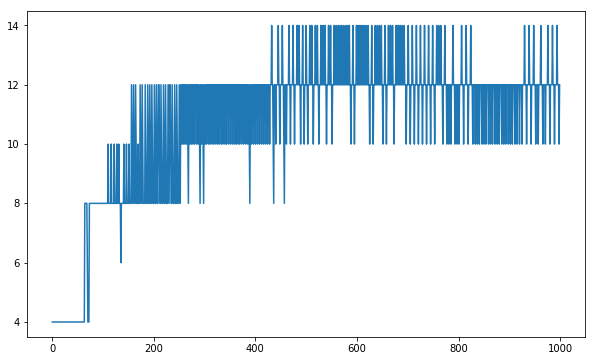

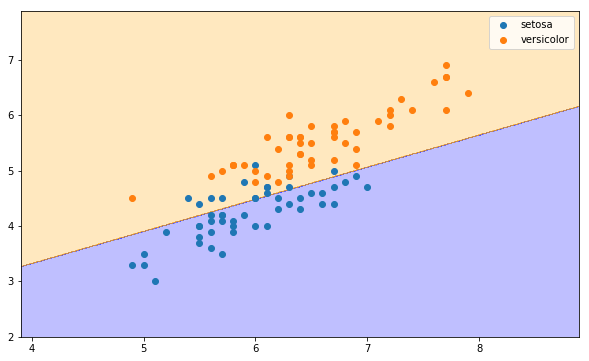

In [21]:
W, errors = perceptron_fit(X, Y)
print_errors(errors)
print_contour(X, Y, W)

## Sklearn implementation

In [22]:
m = iris.target < 2
X = iris.data[:,[1,2]][m]
Y = iris.target[m]
print(X.shape, Y.shape)

(100, 2) (100,)


In [23]:
per = Perceptron(tol = 1e-3, random_state = 0, max_iter = 10000)
per.fit(X, Y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
per.score(X, Y)

1.0

In [25]:
print(per.intercept_, per.coef_)

[-1.] [[-5.5  5.2]]


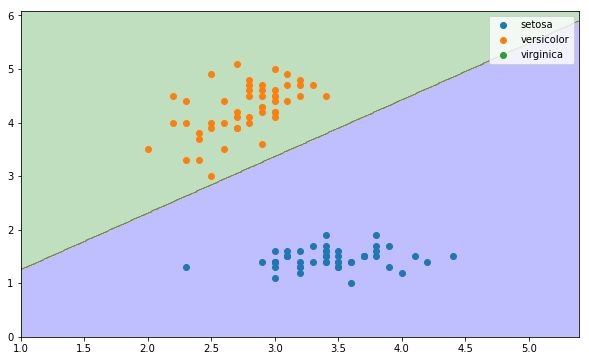

In [26]:
plt.figure(figsize=(10, 6))

x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = per.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha = .25, cmap = ListedColormap(['blue', 'orange', 'green']))

for i, name in enumerate(iris.target_names):
    plt.scatter(X[:,0][Y == i], X[:,1][Y == i], label = name)

plt.legend()
plt.show()